In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [3]:
A.max(axis=3)

array([[[9, 9, 8, 9],
        [7, 7, 9, 5],
        [8, 9, 6, 9]],

       [[9, 9, 8, 8],
        [9, 8, 8, 9],
        [8, 8, 7, 9]]])

In [4]:
A

array([[[[4, 9, 5, 8, 0],
         [7, 7, 0, 9, 8],
         [3, 8, 3, 6, 4],
         [9, 1, 7, 4, 0]],

        [[0, 5, 1, 7, 1],
         [0, 7, 4, 4, 3],
         [1, 2, 7, 6, 9],
         [1, 2, 5, 1, 3]],

        [[7, 8, 6, 2, 4],
         [5, 0, 9, 2, 8],
         [4, 4, 0, 6, 5],
         [9, 4, 7, 5, 7]]],


       [[[9, 9, 4, 3, 5],
         [9, 1, 3, 1, 9],
         [7, 7, 7, 7, 8],
         [4, 8, 7, 4, 1]],

        [[9, 5, 6, 9, 2],
         [7, 0, 8, 4, 2],
         [0, 4, 8, 5, 5],
         [7, 2, 3, 0, 9]],

        [[8, 7, 0, 8, 4],
         [2, 8, 8, 8, 7],
         [2, 0, 2, 7, 1],
         [4, 1, 3, 6, 9]]]])

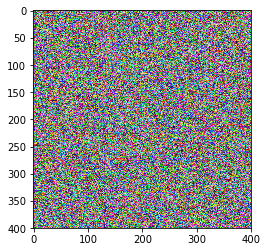

In [5]:
img = np.random.randint(255, size=(400, 400, 3), dtype="uint8")
plt.imshow(img)

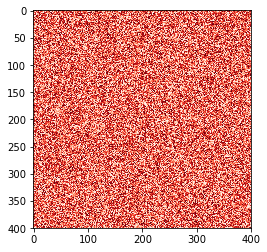

In [6]:
plt.imshow(img[:, :, 0], cmap="Reds")

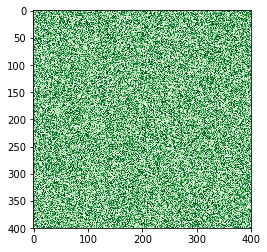

In [7]:
plt.imshow(img[:, :, 0], cmap="Greens")

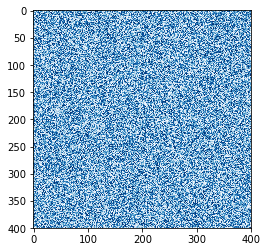

In [8]:
plt.imshow(img[:, :, 0], cmap="Blues")

In [9]:
a = np.array([1, 2])
b = np.array([2, 3])
a * b

array([2, 6])

In [10]:
a = np.array([0, 0, 0, 0, 0, 1, 1 ,1, 1, 1, 0 , 0, 0, 0, 0])

In [11]:
b = np.array([-1, 1])

In [12]:
c = np.convolve(a, b)

In [13]:
c

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0])

In [14]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [15]:
img = misc.ascent()

In [16]:
img.shape

(512, 512)

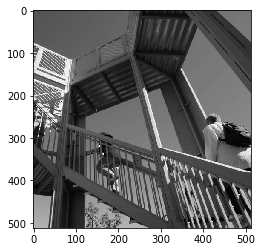

In [17]:
plt.imshow(img, cmap='gray')

In [18]:
h_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
v_kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

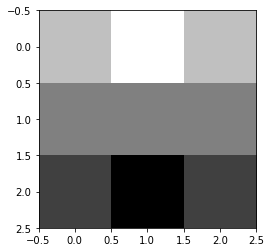

In [19]:
plt.imshow(h_kernel, cmap='gray')

In [20]:
res = convolve2d(img, h_kernel)

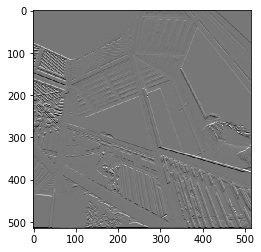

In [21]:
plt.imshow(res, cmap='gray')

In [22]:
resv = convolve2d(img, v_kernel)

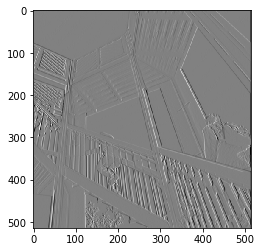

In [23]:
plt.imshow(resv, cmap='gray')

In [50]:
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import MaxPool2D
from keras.layers import AveragePooling2D

In [25]:
img.shape

(512, 512)

In [26]:
img_tensor = img.reshape(1, 512, 512, 1)

In [27]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2, 1), input_shape=(512, 512, 1)))

In [28]:
img_prod = model.predict(img_tensor)

In [29]:
img_prod.shape

(1, 255, 510, 1)

In [30]:
im = img_prod.reshape(255, 510)

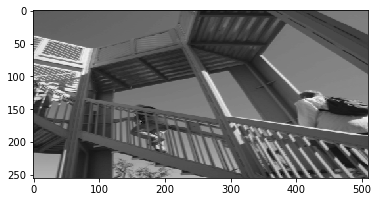

In [31]:
plt.imshow(im, cmap='gray')

In [32]:
weights = model.get_weights()

In [33]:
weights[0].shape

(3, 3, 1, 1)

In [34]:
weights[0] = np.ones(weights[0].shape)

In [35]:
model.set_weights(weights)

In [36]:
imgp = model.predict(img_tensor)

In [37]:
imgp.shape

(1, 255, 510, 1)

In [38]:
im2 = imgp[0, :, :, 0]

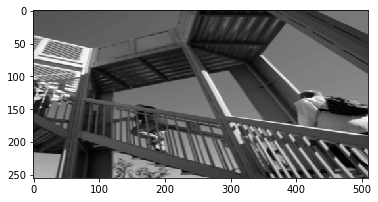

In [39]:
plt.imshow(im2, cmap='gray')

In [41]:
img.shape

(512, 512)

In [42]:
img_tensor = img.reshape(1, 512, 512, 1)

In [51]:
model = Sequential()
model.add(AveragePooling2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [52]:
pooled = model.predict(img_tensor)

In [53]:
pooled.shape

(1, 102, 102, 1)

In [54]:
pimg = pooled[0, :, :, 0]

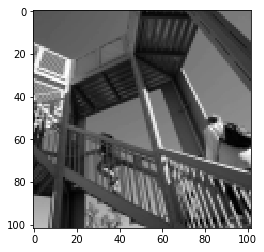

In [55]:
plt.imshow(pimg, cmap='gray')